In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h1 id='overview' style="text-align:center;">
        <b> 1. Data overview </b>
        <a class="anchor-link" href="https://www.kaggle.com/code/pawkooo13/titanic-ann/notebook#overview">¶</a>
    </h1>
</div>

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 1.1 Drop unnecessary columns </b>
    </h3>
</div>

In [6]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
data['Cabin'] = data.Cabin.str.get(0)

In [8]:
data['is_Cabin_nan'] = data.Cabin.isna().astype('int16')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,is_Cabin_nan
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [11]:
data.Embarked.isna().sum()

2

In [12]:
idx_to_drop = data.query('Embarked.isna()').index

In [13]:
data = data.drop(idx_to_drop, axis=0)

In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,is_Cabin_nan
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_Cabin_nan
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.772778
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,0.419273
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 1.2 Fill NaN </b>
    </h3>
</div>

In [17]:
data.Age.fillna(data.Age.median(), inplace=True)

In [18]:
data.count()

Survived        889
Pclass          889
Sex             889
Age             889
SibSp           889
Parch           889
Fare            889
Cabin           202
Embarked        889
is_Cabin_nan    889
dtype: int64

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 1.3 Plots </b>
    </h3>
</div>

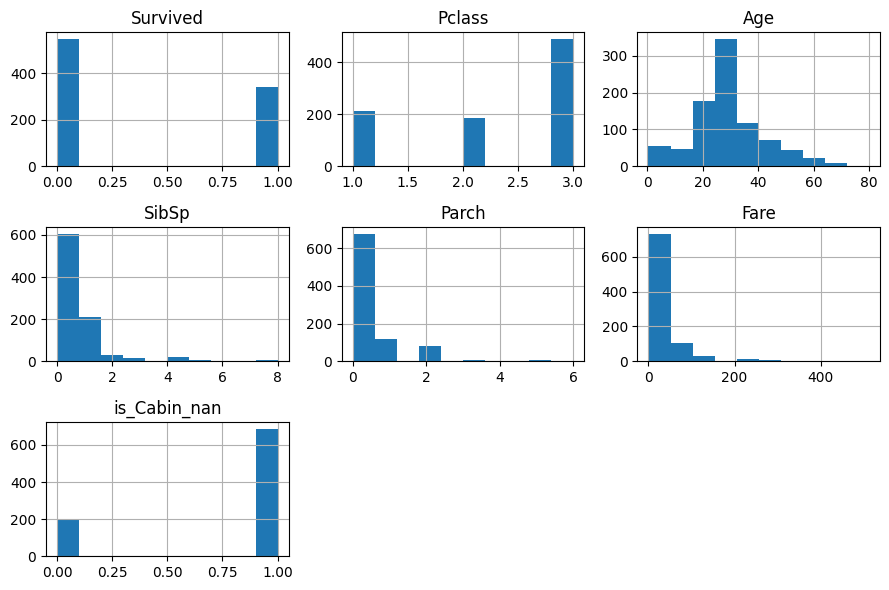

In [19]:
data.hist(figsize=(9,6))
plt.tight_layout()

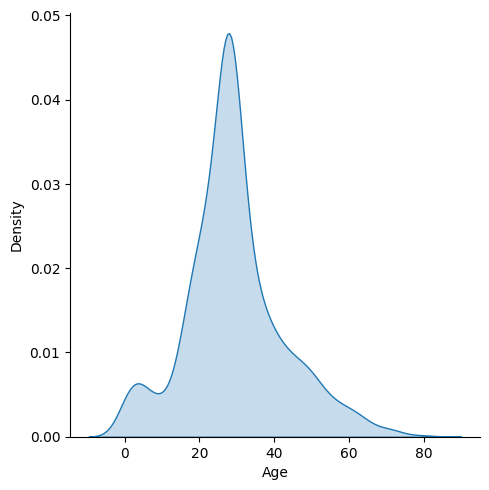

In [20]:
sns.displot(data=data, x='Age', kind="kde", fill=True)

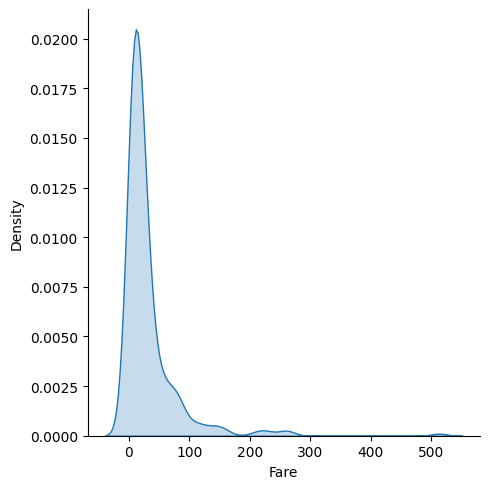

In [21]:
sns.displot(data=data, x='Fare', kind="kde", fill=True)

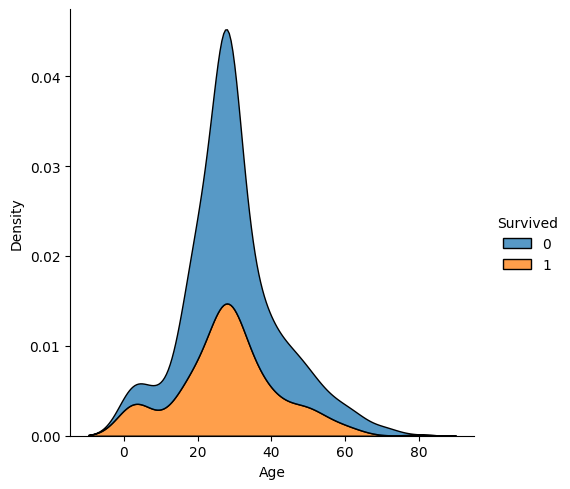

In [22]:
sns.displot(data=data, x='Age', hue='Survived', multiple="stack", kind="kde")

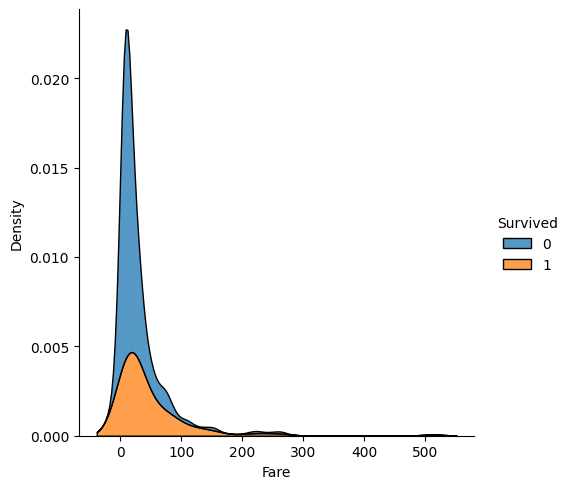

In [23]:
sns.displot(data=data, x='Fare', hue='Survived', multiple="stack", kind="kde")

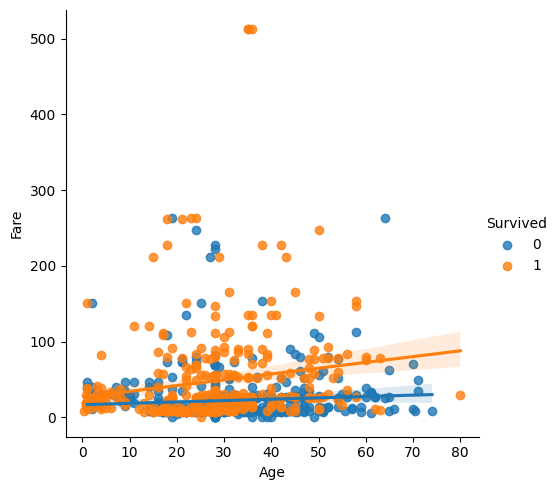

In [24]:
sns.lmplot(data=data, x='Age', y='Fare', hue='Survived')

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 1.4 Data standarization </b>
    </h3>
</div>

In [25]:
Y = data.pop('Survived')

In [26]:
ct = ColumnTransformer(transformers=[('num_preprocess', StandardScaler(), ['Age', 'Fare'])], 
                       remainder='passthrough',
                       verbose_feature_names_out=False)

ct.set_output(transform='pandas')

std_data = ct.fit_transform(data)

In [27]:
std_data

,Age,Fare,Pclass,Sex,SibSp,Parch,Cabin,Embarked,is_Cabin_nan
0,-0.563674,-0.500240,3,male,1,0,NaN,S,1
1,0.669217,0.788947,1,female,1,0,C,C,0
2,-0.255451,-0.486650,3,female,0,0,NaN,S,1
3,0.438050,0.422861,1,female,1,0,C,S,0
4,0.438050,-0.484133,3,male,0,0,NaN,S,1
...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.384475,2,male,0,0,NaN,S,1
885,-0.794841,-0.042213,1,female,0,0,B,S,0
886,-0.101340,-0.174084,3,female,1,2,NaN,S,1
887,-0.255451,-0.042213,1,male,0,0,C,C,0


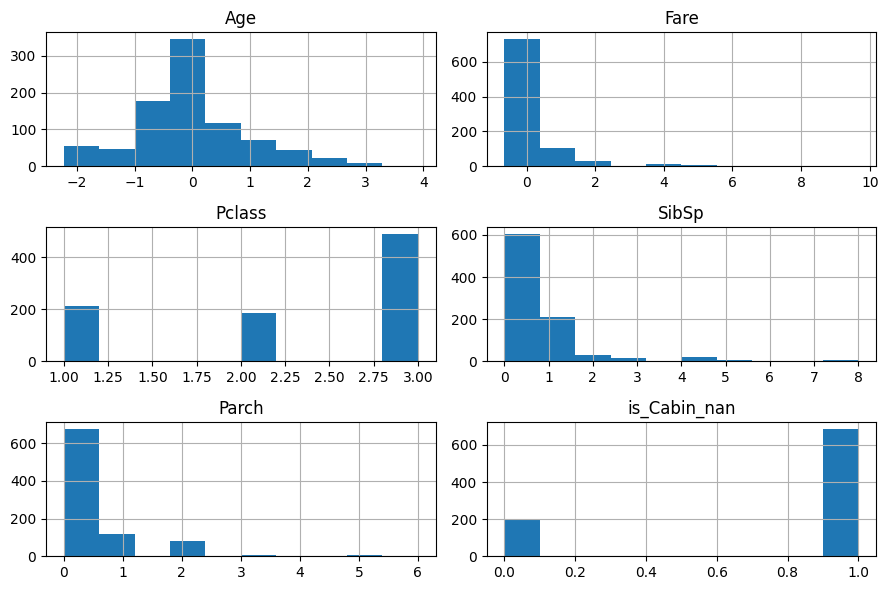

In [28]:
std_data.hist(figsize=(9,6))
plt.tight_layout()

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 1.5 Categorical to numeric </b>
    </h3>
</div>

In [29]:
encoder = OrdinalEncoder(encoded_missing_value=-1,
                         handle_unknown="use_encoded_value", 
                         unknown_value=-1)

In [30]:
enc_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

In [31]:
data_to_encode = std_data[enc_cols]

enc_data = encoder.fit_transform(data_to_encode)

In [32]:
enc_data = pd.DataFrame(enc_data, columns=enc_cols)
enc_data.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,2.0,1.0,1.0,0.0,-1.0,2.0
1,0.0,0.0,1.0,0.0,2.0,0.0
2,2.0,0.0,0.0,0.0,-1.0,2.0
3,0.0,0.0,1.0,0.0,2.0,2.0
4,2.0,1.0,0.0,0.0,-1.0,2.0


In [33]:
processed_data = pd.concat([enc_data, std_data[['Age', 'Fare', 'is_Cabin_nan']]], axis=1)
processed_data.tail()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age,Fare,is_Cabin_nan
884,1.0,1.0,0.0,0.0,-1.0,2.0,-0.178396,-0.384475,1
885,0.0,0.0,0.0,0.0,1.0,2.0,-0.794841,-0.042213,0
886,2.0,0.0,1.0,2.0,-1.0,2.0,-0.101340,-0.174084,1
887,0.0,1.0,0.0,0.0,2.0,0.0,-0.255451,-0.042213,0
888,2.0,1.0,0.0,0.0,-1.0,1.0,0.206883,-0.490173,1


In [34]:
X = pd.get_dummies(data=processed_data, 
                   columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])

In [35]:
X.head()

,Age,Fare,is_Cabin_nan,Pclass_0.0,Pclass_1.0,Pclass_2.0,Sex_0.0,Sex_1.0,SibSp_0.0,SibSp_1.0,...,Cabin_1.0,Cabin_2.0,Cabin_3.0,Cabin_4.0,Cabin_5.0,Cabin_6.0,Cabin_7.0,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,-0.563674,-0.500240,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.669217,0.788947,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,-0.255451,-0.486650,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.438050,0.422861,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0.438050,-0.484133,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 1.6 Data splitting </b>
    </h3>
</div>

In [36]:
X.shape, Y.shape

((889, 34), (889,))

In [37]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

In [38]:
(X_train.shape, Y_train.shape), (X_val.shape, Y_val.shape)

(((666, 34), (666,)), ((223, 34), (223,)))

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h1 id='models' style="text-align:center;">
        <b> 2. Models </b>
        <a class="anchor-link" href="https://www.kaggle.com/code/pawkooo13/titanic-ann/notebook#models">¶</a>
    </h1>
</div>

In [39]:
def classification_report(model, param_grid):
    scoring = ['balanced_accuracy', 'f1']
    
    cv = GridSearchCV(estimator=model, 
                      param_grid=param_grid, 
                      scoring=scoring,
                      refit='balanced_accuracy',
                      cv=3)
    
    cv.fit(X_train, Y_train)
    
    print('Best params:', cv.best_estimator_)
    print('Cv score:', cv.best_score_)
    
    preds = cv.predict(X_val)
    print('Pred score:', accuracy_score(y_true=Y_val, 
                                        y_pred=preds))
    
    cm = confusion_matrix(y_true=Y_val, 
                          y_pred=preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', colorbar=False)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.1 Logistic regression </b>
    </h3>
</div>

In [40]:
LR_params = {'solver': ['liblinear'], 
             'penalty': ['l1', 'l2'], 
             'max_iter': [50, 100, 200, 500]}

In [41]:
LR = LogisticRegression(random_state=42)

Best params: LogisticRegression(max_iter=50, random_state=42, solver='liblinear')
Cv score: 0.7893866849065208
Pred score: 0.8116591928251121


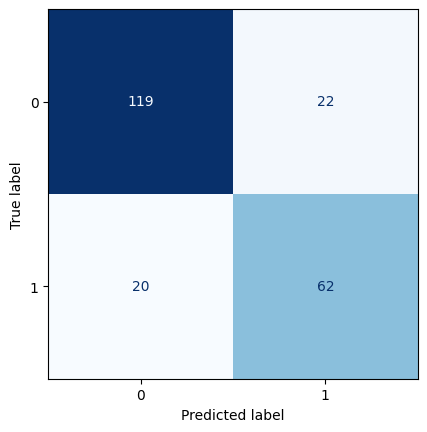

In [42]:
classification_report(model=LR, param_grid=LR_params)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.2 Support Vector Machines </b>
    </h3>
</div>

In [43]:
SVM_params = {'C': [0.1, 1.0, 10.0], 
              'kernel': ['linear', 'poly', 'rbf'], 
              'degree': [2, 3, 4]}

In [44]:
SVM = SVC(random_state=42)

Best params: SVC(C=10.0, degree=2, kernel='poly', random_state=42)
Cv score: 0.8000170998632011
Pred score: 0.8161434977578476


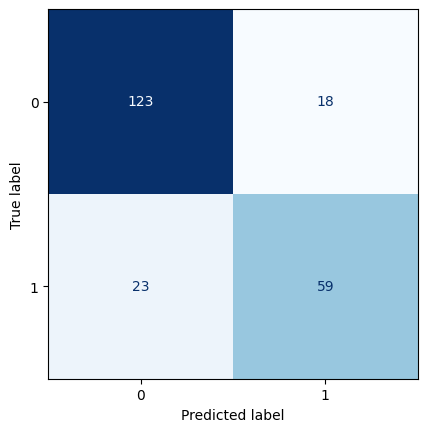

In [45]:
classification_report(model=SVM, param_grid=SVM_params)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.3 KNN </b>
    </h3>
</div>

In [46]:
KNN_params = {'n_neighbors': [3, 5, 10, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski'],
              'p': [1, 2]}

In [47]:
KNN = KNeighborsClassifier()

Best params: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance')
Cv score: 0.7997891016871864
Pred score: 0.7892376681614349


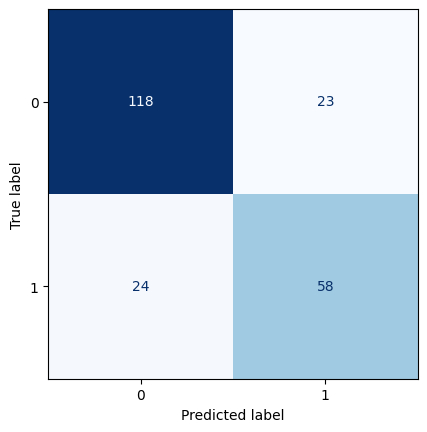

In [48]:
classification_report(model=KNN, param_grid=KNN_params)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.4 Decision Tree </b>
    </h3>
</div>

In [49]:
DT_params = {'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': [3, 5, 10, 20, 30]}

In [50]:
DT = DecisionTreeClassifier(random_state=42)

Best params: DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
Cv score: 0.7780437756497949
Pred score: 0.7713004484304933


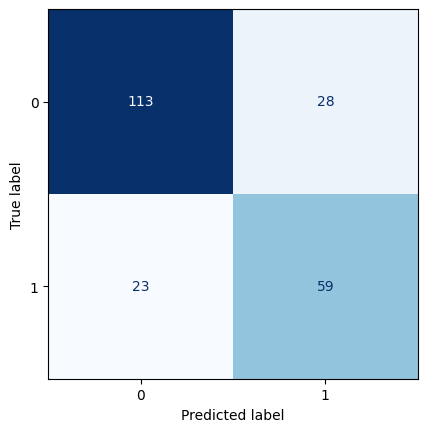

In [51]:
classification_report(model=DT, param_grid=DT_params)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.5 SGDClassifier </b>
    </h3>
</div>

In [52]:
SGD_params = {'loss': ['hinge', 'log_loss', 'huber', 'modified_huber', 'perceptron', 'squared_error'],
              'penalty': ['l1', 'l2'],
              'alpha': [1e-03, 1e-04, 1e-05],
              'eta0': [0.1, 0.01, 0.001, 0.0001],
              'max_iter': [500, 1000, 2000, 5000]}

In [53]:
SGD = SGDClassifier(learning_rate='constant', random_state=42)

Best params: SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=500, random_state=42)
Cv score: 0.7916381668946649
Pred score: 0.8116591928251121


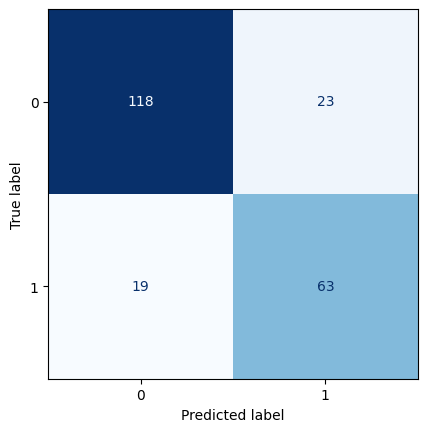

In [54]:
classification_report(model=SGD, param_grid=SGD_params)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.6 Random Forest </b>
    </h3>
</div>

In [55]:
RF_params = {'n_estimators': [50, 100, 300, 500],
             'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': [3, 5, 10, 20, 30]}

In [56]:
RF = RandomForestClassifier(random_state=42)

Best params: RandomForestClassifier(max_depth=10, random_state=42)
Cv score: 0.8130699954400363
Pred score: 0.7982062780269058


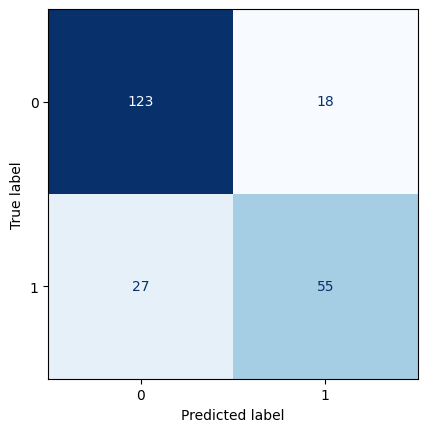

In [57]:
classification_report(model=RF, param_grid=RF_params)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 2.7 ANN </b>
    </h3>
</div>

In [58]:
from keras_tuner import HyperParameters as hp
from keras_tuner import HyperModel
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from keras_tuner import Objective
import math
from tensorflow.keras.layers import Dropout

In [64]:
class MyHyperModel(HyperModel):
    
    def build(self, hp):
        model = Sequential()
        model.add(Input(shape=(34,)))
        
        model_type = hp.Choice(name='model_type', 
                               values=['fc', 'p']) 
        
        n_layer = hp.Int(name='n_layer',
                         min_value=1,
                         max_value=5)

        n_unit = hp.Int(name='n_unit',
                        min_value=8,
                        max_value=64,
                        step=2,
                        sampling='log')

        activation = hp.Choice(name='activation',
                               values=['relu', 'tanh'])

        lr = hp.Float(name='learning_rate',
                      min_value=1e-5,
                      max_value=1e-1,
                      step=10,
                      sampling="log")
        
        with hp.conditional_scope('model_type', ['fc']):
            if model_type == 'fc':
                for _ in range(n_layer):
                    model.add(Dense(units=n_unit,
                                    activation=activation))
        
        with hp.conditional_scope('model_type', ['p']):
            if model_type == 'p':
                units = n_unit
                while(math.floor(units) != 1):
                    model.add(Dense(units=units,
                                    activation=activation))
                    units = math.sqrt(units)
                    
        model.add(Dense(units=1,
                        activation='sigmoid'))
        
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics='accuracy')
        
        return model
        

In [65]:
hypermodel=MyHyperModel()

In [66]:
ANN_rs = RandomSearch(hypermodel=hypermodel,
                      objective=Objective(name="val_accuracy", direction="max"),
                      max_trials=50,
                      executions_per_trial=1,
                      directory='/kaggle/working/',
                      project_name='Random Search',
                      seed=42)

In [67]:
es = EarlyStopping(monitor='val_loss', patience=10)

In [68]:
ANN_rs.search(X_train, 
              Y_train, 
              epochs=200, 
              validation_data=(X_val, Y_val),
              verbose=0,
              callbacks=[es])

In [69]:
ANN_rs.results_summary(num_trials=5)

Results summary
Results in /kaggle/working/Random Search
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 12 summary
Hyperparameters:
model_type: fc
n_layer: 5
n_unit: 64
activation: tanh
learning_rate: 0.01
Score: 0.834080696105957

Trial 08 summary
Hyperparameters:
model_type: fc
n_layer: 3
n_unit: 32
activation: relu
learning_rate: 0.01
Score: 0.8295964002609253

Trial 03 summary
Hyperparameters:
model_type: fc
n_layer: 3
n_unit: 8
activation: relu
learning_rate: 0.001
Score: 0.8295964002609253

Trial 00 summary
Hyperparameters:
model_type: p
n_layer: 1
n_unit: 16
activation: relu
learning_rate: 0.1
Score: 0.8295964002609253

Trial 11 summary
Hyperparameters:
model_type: fc
n_layer: 2
n_unit: 16
activation: relu
learning_rate: 0.001
Score: 0.8295964002609253


In [83]:
ANN = Sequential([
    Input(shape=(34,)),
    Dense(units=16, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=16, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=1, activation='sigmoid')
])

In [84]:
ANN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                560       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [85]:
ANN.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

In [86]:
es = EarlyStopping(monitor='val_loss', patience=10)

In [87]:
history = ANN.fit(X_train,
                  Y_train,
                  validation_data=(X_val, Y_val),
                  epochs=300,
                  callbacks=[es])

Epoch 1/300
21/21 [==============================] - 1s 10ms/step - loss: 0.7877 - accuracy: 0.4144 - val_loss: 0.7327 - val_accuracy: 0.4126
Epoch 2/300
21/21 [==============================] - 0s 3ms/step - loss: 0.7211 - accuracy: 0.4715 - val_loss: 0.6859 - val_accuracy: 0.5381
Epoch 3/300
21/21 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5781 - val_loss: 0.6501 - val_accuracy: 0.7265
Epoch 4/300
21/21 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6592 - val_loss: 0.6183 - val_accuracy: 0.7534
Epoch 5/300
21/21 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6907 - val_loss: 0.5910 - val_accuracy: 0.7354
Epoch 6/300
21/21 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.6802 - val_loss: 0.5680 - val_accuracy: 0.7623
Epoch 7/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.6997 - val_loss: 0.5430 - val_accuracy: 0.7758
Epoch 8/300


<AxesSubplot: >

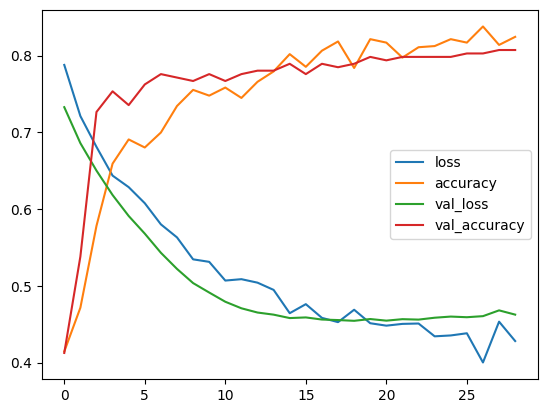

In [88]:
pd.DataFrame(history.history).plot()

In [89]:
preds = np.round(ANN.predict(X_val))

7/7 [==============================] - 0s 2ms/step


0.8071748878923767


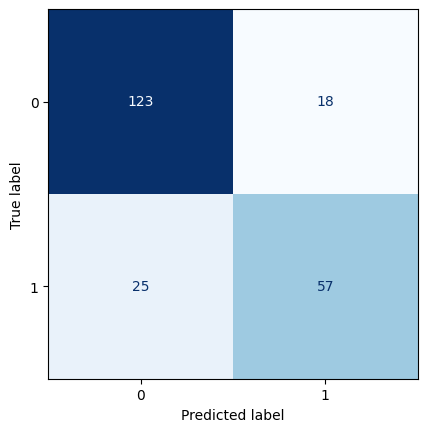

In [90]:
cm = confusion_matrix(y_true=Y_val, 
                      y_pred=preds)

print(accuracy_score(y_true=Y_val,
                     y_pred=preds))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h1 id='predictions' style="text-align:center;">
        <b> 3. Predictions </b>
        <a class="anchor-link" href="https://www.kaggle.com/code/pawkooo13/titanic-ann/notebook#predictions">¶</a>
    </h1>
</div>

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 3.1 Prepare test dataset </b>
    </h3>
</div>

In [91]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [92]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [94]:
passenger_id = test['PassengerId']

In [95]:
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [96]:
test['Cabin'] = test.Cabin.str.get(0)

In [97]:
test['is_Cabin_nan'] = test.Cabin.isna().astype('int16')

In [98]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,is_Cabin_nan
0,3,male,34.5,0,0,7.8292,NaN,Q,1
1,3,female,47.0,1,0,7.0000,NaN,S,1
2,2,male,62.0,0,0,9.6875,NaN,Q,1
3,3,male,27.0,0,0,8.6625,NaN,S,1
4,3,female,22.0,1,1,12.2875,NaN,S,1


In [99]:
test.Age.fillna(data.Age.median(), inplace=True)

In [100]:
test.Fare.fillna(data.Fare.median(), inplace=True)

In [101]:
std_test = ct.transform(test)

In [102]:
std_test.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Cabin,Embarked,is_Cabin_nan
0,0.399522,-0.488579,3,male,0,0,NaN,Q,1
1,1.362718,-0.505273,3,female,1,0,NaN,S,1
2,2.518553,-0.451165,2,male,0,0,NaN,Q,1
3,-0.178396,-0.471802,3,male,0,0,NaN,S,1
4,-0.563674,-0.398819,3,female,1,1,NaN,S,1


In [103]:
to_encode = std_test[enc_cols]

enc_test = encoder.transform(to_encode)

In [104]:
enc_test = pd.DataFrame(enc_test, columns=enc_cols)
enc_test.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,2.0,1.0,0.0,0.0,-1.0,1.0
1,2.0,0.0,1.0,0.0,-1.0,2.0
2,1.0,1.0,0.0,0.0,-1.0,1.0
3,2.0,1.0,0.0,0.0,-1.0,2.0
4,2.0,0.0,1.0,1.0,-1.0,2.0


In [105]:
processed_test = pd.concat([enc_test, std_test[['Age', 'Fare', 'is_Cabin_nan']]], axis=1)
processed_test.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age,Fare,is_Cabin_nan
0,2.0,1.0,0.0,0.0,-1.0,1.0,0.399522,-0.488579,1
1,2.0,0.0,1.0,0.0,-1.0,2.0,1.362718,-0.505273,1
2,1.0,1.0,0.0,0.0,-1.0,1.0,2.518553,-0.451165,1
3,2.0,1.0,0.0,0.0,-1.0,2.0,-0.178396,-0.471802,1
4,2.0,0.0,1.0,1.0,-1.0,2.0,-0.563674,-0.398819,1


In [106]:
X_test = pd.get_dummies(data=processed_test, 
                        columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])

In [107]:
X_test.head()

,Age,Fare,is_Cabin_nan,Pclass_0.0,Pclass_1.0,Pclass_2.0,Sex_0.0,Sex_1.0,SibSp_0.0,SibSp_1.0,...,Cabin_0.0,Cabin_1.0,Cabin_2.0,Cabin_3.0,Cabin_4.0,Cabin_5.0,Cabin_6.0,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,0.399522,-0.488579,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.362718,-0.505273,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2.518553,-0.451165,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.178396,-0.471802,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.563674,-0.398819,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [108]:
X_test.shape

(418, 34)

<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h3 style="text-align:center;">
        <b> 3.2 Save predictions </b>
    </h3>
</div>

In [109]:
predictions = np.round(ANN.predict(X_test))

14/14 [==============================] - 0s 980us/step


In [110]:
summary = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions.flatten()}, dtype=np.int16)

In [111]:
summary.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [112]:
summary.to_csv('Titanic_preds.csv', index=False)

**Accuracy: 0.75837**